## Modelo Hocking


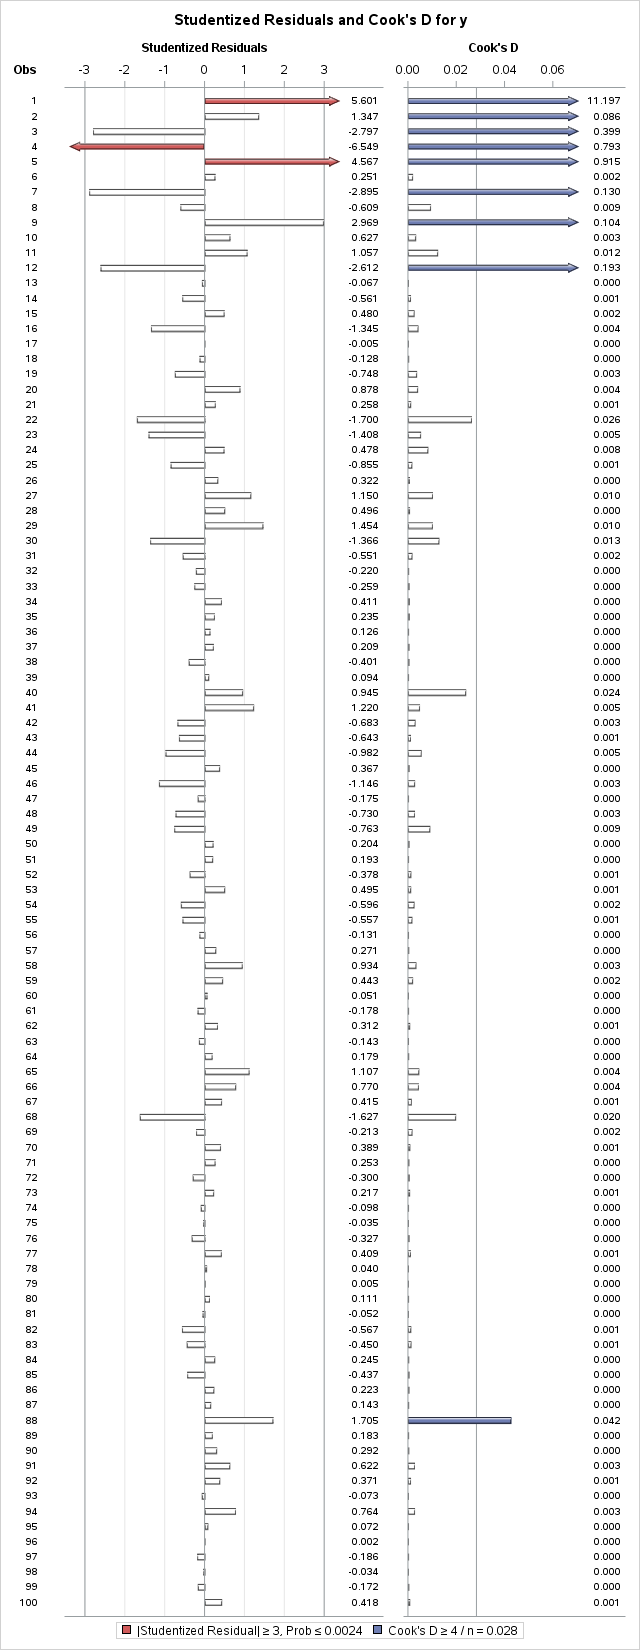
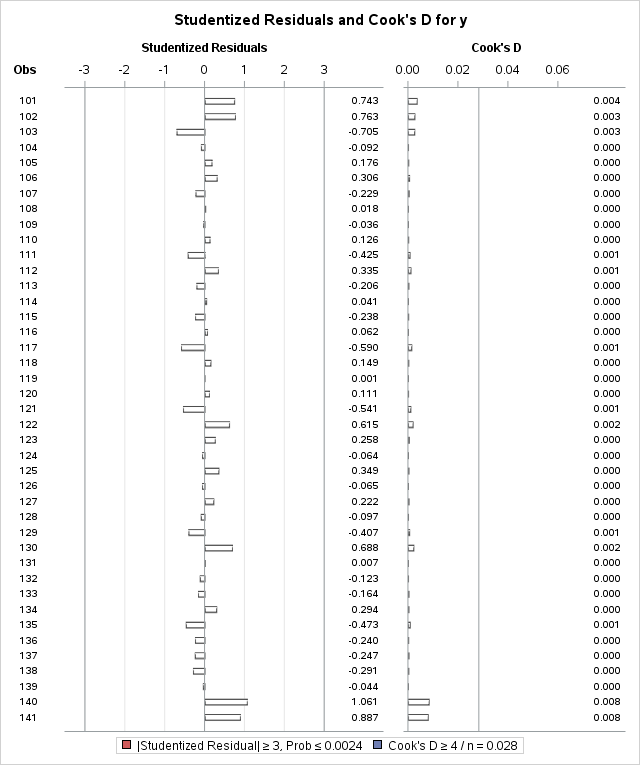
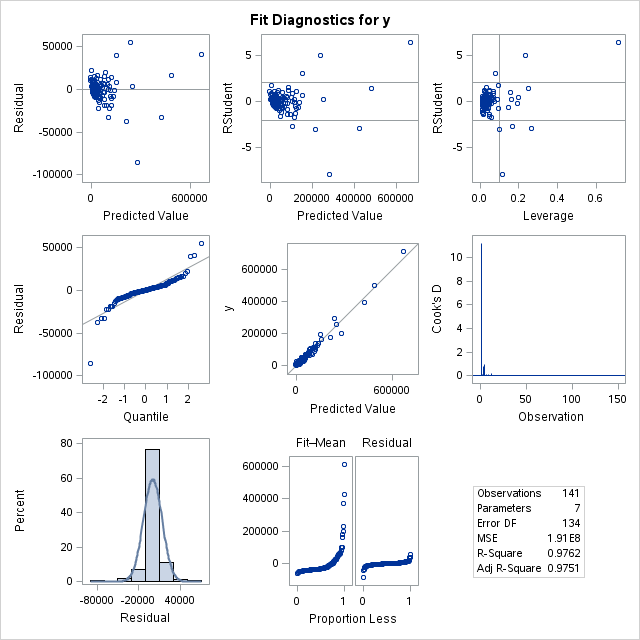
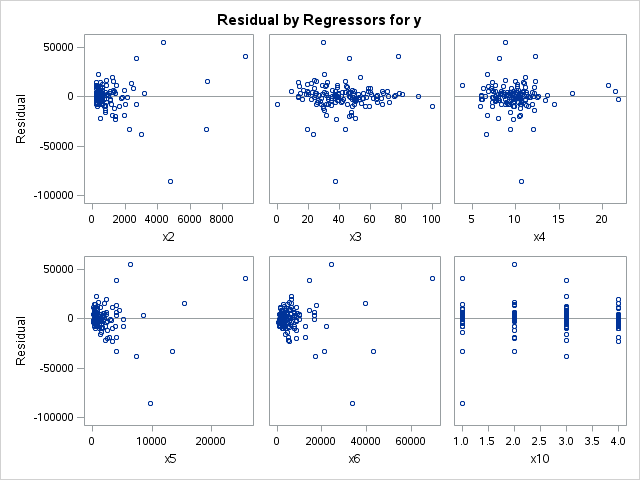
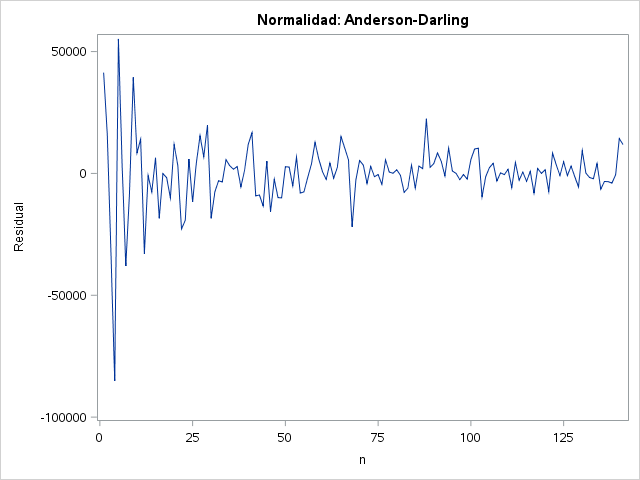

In [1]:
/*LEEMOS LOS DATOS DEL ARCHIVO DE EXCEL*/
FILENAME REFFILE '/folders/myfolders/AnalisisRegresion/SMSA1.xlsx';
PROC IMPORT DATAFILE=REFFILE
	DBMS=XLSX
	OUT=WORK.datos;
	GETNAMES=YES;
RUN;
quit;


PROC REG DATA=datos; 
	model y =  x2 x3 x4 x5 x6 x10/ VIF SPEC DW clb r cli clm;
	output out=out  predicted=yestimada 
	Residual=residuales 
	lcl=ciPredicIndivi
   ucl=csPredicIndivi
   lclm=ciEsperado
   uclm=csEsperado;
run;
quit;

proc univariate data=out normal; /* Anderson-Darling */
	var residuales;
	title 'Normalidad: Anderson-Darling ';
run;
quit;

data newdata;
merge out datos;
run;
quit;

PROC PRINT DATA =newdata;
RUN;
QUIT;


proc sgplot data=newdata;
   series x=n y=residuales; 
run;
